In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import stats
import seaborn as sns

In [5]:
file_path = r"C:\Python\HessiSolarFlare2018.csv"  #2002to2018.csv
df = pd.read_csv(file_path)
formatT = '%Y-%m-%d %H:%M:%S'
df['Datetime'] = pd.to_datetime(df['start.date'] + ' ' + df['start.time'], format=formatT)
df = df.set_index(pd.DatetimeIndex(df['Datetime']))
df = df.drop(columns=['start.date', 'start.time', 'Datetime'])
#organizo en otros dataframes las columnas de duracion.s y energia.kev en orden descendente
Emin = []
Emax = []
Eprom = []
for i in df['energy.kev']:
    result = re.findall(r'[\d\.\d]+', i)
    Emax.append(float(result[1]))
    Emin.append(float(result[0]))
    Eprom.append((float(result[0]) + float(result[1]))/2)
df['EnergiaMin']=Emin
df['EnergiaMax']=Emax
df['EnergiaProm']=Eprom
#saca las flags en distintos dataframes
df1=pd.DataFrame(df.value_counts('flag.1'),columns=['Bandera1']).reset_index()
df2=pd.DataFrame(df.value_counts('flag.2'),columns=['Bandera2']).reset_index()
df3=pd.DataFrame(df.value_counts('flag.3'),columns=['Bandera3']).reset_index()
df4=pd.DataFrame(df.value_counts('flag.4'),columns=['Bandera4']).reset_index()
df5=pd.DataFrame(df.value_counts('flag.5'),columns=['Bandera5']).reset_index()
#Filtro para datos de calidad Q1 (la mayor posible de la base de datos con respecto a la flag Qn)
Q13=df['flag.3']=="Q1"
Q14=df['flag.4']=="Q1"
Q15=df['flag.5']=="Q1"
dfQ13=df[Q13]
dfQ1=pd.concat([df[Q13],df[Q14],df[Q15]]).sort_values('Datetime')
dfQ1.value_counts('flag.3')

flag.3
P1    20074
PE    19363
PS     1515
DF      475
Q1      466
DR      175
EE       72
ES       66
GS       40
NS        9
GE        8
GD        1
dtype: int64

In [6]:
#graficas y analisis de datos
"""hipotesis estadistica de eventos solares con la bandera de posicion valida P1
   con datos de calidad Q1"""
P13=dfQ1['flag.3']=="P1"
P14=dfQ1['flag.4']=="P1"
P15=dfQ1['flag.5']=="P1"
#dataframe con los eventos solares observados (validos y posibles con calidad Q1)
dfsf=pd.concat([dfQ1[P13],dfQ1[P14],dfQ1[P15]]).sort_index()
#se extraen datos nulos
dfsffull=dfsf.dropna(how='any')
#imprimo la grafica
#sns.barplot(data=dfsffull,x=dfsffull['duration.s'],y='EnergiaMin')
#promedios
PromEnergiaP=dfsffull['EnergiaProm'].mean()
PromEnergiaMin=dfsffull['EnergiaMin'].mean()
PromEnergiaMax=dfsffull['EnergiaMax'].mean()
Promduracion=dfsffull['duration.s'].mean()
print("el promedio de la energia promedio es ",PromEnergiaP, "\n el primedio de la energia min es",PromEnergiaMin,"\n el promedio de la energia maxima es",PromEnergiaMax,"\n promedio de duracion",Promduracion)
#dfsffull
#sns.displot(data=df, x='')

el promedio de la energia promedio es  21.645833333333332 
 el primedio de la energia min es 14.106884057971014 
 el promedio de la energia maxima es 29.184782608695652 
 promedio de duracion 944.2608695652174


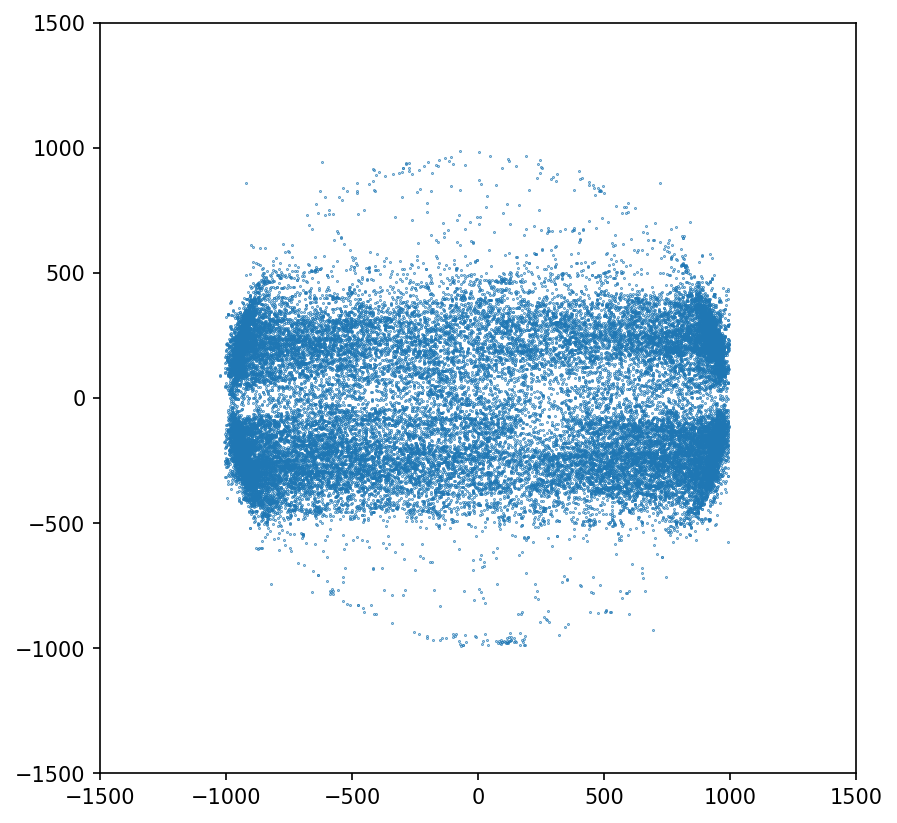

In [7]:
plt.figure(figsize=(6.5,6.5), dpi = 150)
plt.xlim(-1500,1500)
plt.ylim(-1500,1500)
plt.scatter(dfQ1['x.pos.asec'], dfQ1['y.pos.asec'],s=0.1)

<AxesSubplot:xlabel='duration.s', ylabel='EnergiaProm'>

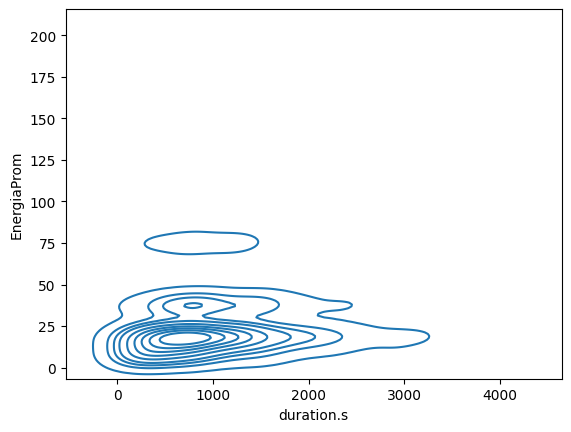

In [8]:
sns.kdeplot(data=dfsffull,x='duration.s',y='EnergiaProm')

In [3]:
plank=4.135667696*pow(10,-15)
Frec=[]
for i in df.index:
    Frec.append(df['EnergiaProm']/plank)
print(plank)

NameError: name 'df' is not defined